In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#open file
df = pd.read_csv('tanglaw_data.csv')

In [3]:
#check out the dataframe
df.head()

,Index,B1,B2,B3,B4,B5,B6,B7,Chl-a
0,0,561,621,725,634,93,429,278,9.73
1,1,550,625,742,649,91,443,296,9.46
2,2,561,639,763,658,94,461,321,11.02
3,3,557,650,766,676,98,474,325,10.73
4,4,748,752,815,674,89,95,121,13.38


In [4]:
# Separate X and y
# there are two ways to get X and y

In [5]:
#get columns based on column names
X = df[['B1','B2','B3',
      'B4','B5','B6','B7']] #if more than 1 column, list of columns must be specified
y = df['Chl-a'] #provide the column name if only 1

In [6]:
#Checkout data
X.head(5)

,B1,B2,B3,B4,B5,B6,B7
0,561,621,725,634,93,429,278
1,550,625,742,649,91,443,296
2,561,639,763,658,94,461,321
3,557,650,766,676,98,474,325
4,748,752,815,674,89,95,121


In [7]:
#Checkout data
y.head(5)

0     9.73
1     9.46
2    11.02
3    10.73
4    13.38
Name: Chl-a, dtype: float64

## Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, # size of test data in percentage
                                                    random_state = 1 # can be any number
                                                   )

#export to train and test
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)
train_data.to_csv('train_data.csv', index = False)
test_data.to_csv('test_data.csv', index = False)

In [9]:
#Check dimensions of train and test
print(f'Rows of train data: {X_train.shape[0]}')
print(f'Rows of test data: {X_test.shape[0]}')

Rows of train data: 1570
Rows of test data: 673


## Creating and Training the Model

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) #this line will train the model using the train data

LinearRegression()

## Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [11]:
# print the intercept
print(model.intercept_)

21.279921638910437


In [12]:
coeff_df = pd.DataFrame(model.coef_,
                        X_train.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
B1,0.020257
B2,-0.045105
B3,-0.021096
B4,0.046132
B5,0.001130
B6,-0.007014
B7,0.002335


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in B1 is associated with an increase of 0.022261 in Chl-a.
- Holding all other features fixed, a 1 unit increase in B2 is associated with an increase of -0.044322 in Chl-a.
- Holding all other features fixed, a 1 unit increase in B3 is associated with an increase of -0.018041 in Chl-a.
- Holding all other features fixed, a 1 unit increase in B4 is associated with an increase of 0.040453 in Chl-a.
- Holding all other features fixed, a 1 unit increase in B5 is associated with an increase of 0.003927 in Chl-a.
- Holding all other features fixed, a 1 unit increase in B6 is associated with an increase of -0.009520 in Chl-a.
- Holding all other features fixed, a 1 unit increase in B7 is associated with an increase of 0.001651 in Chl-a.

## Predictions from our Model

In [13]:
test_predictions = model.predict(X_test) #create prediction or apply the intercept and coeff without hard coding

C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Predicted')

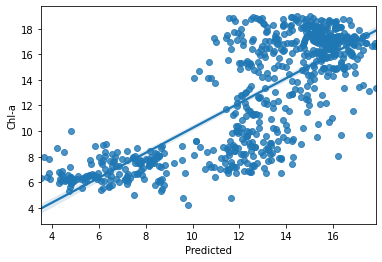

In [14]:
sns.regplot(test_predictions, y_test)
plt.xlabel('Predicted')

In [15]:
error = y_test - test_predictions

C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Chl-a', ylabel='Density'>

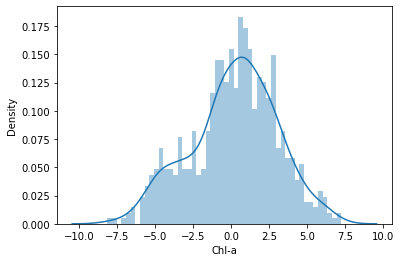

In [16]:
sns.distplot((error),
             bins = 50)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dlaniger\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


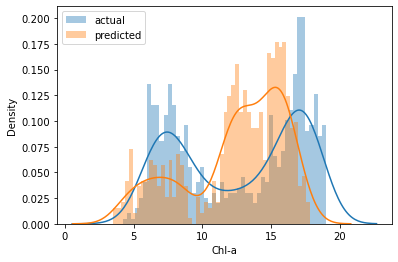

In [17]:
sns.distplot((y_test),
             bins = 50, 
             label = 'actual')
sns.distplot((test_predictions),
             bins = 50,
            label = 'predicted')
plt.legend()

In [18]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))

MAE: 2.2670591569396077
MSE: 8.045543103076035
RMSE: 2.8364666581992526


In [19]:
from sklearn.metrics import r2_score

train_predictions = model.predict(X_train)
print(f'Train R2: {r2_score(y_train, train_predictions)}')
print(f'Train R2: {r2_score(y_test, test_predictions)}')

Train R2: 0.6105682378431754
Train R2: 0.6078829967682668


In [29]:
#scale the data by standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [32]:
#refit using the standardized X
model.fit(X_train_sc, y_train)

LinearRegression()

In [33]:
test_predictions_sc = model.predict(X_test_sc)

print('MAE:', metrics.mean_absolute_error(y_test, test_predictions_sc))
print('MSE:', metrics.mean_squared_error(y_test, test_predictions_sc))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions_sc)))

MAE: 2.2670591569396086
MSE: 8.04554310307604
RMSE: 2.8364666581992535


In [34]:
#create a pipeline to streamline
from sklearn.pipeline import Pipeline

#pipeline automatically scales and fit the data
pipeline = Pipeline(steps=[('sc', StandardScaler()),
            ('mod',LinearRegression())])

In [35]:
#refit using pipeline
pipeline.fit(X_train, y_train) #notice that we are using the unscaled train data

Pipeline(steps=[('sc', StandardScaler()), ('mod', LinearRegression())])

In [36]:
test_predictions_scaled = pipeline.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, test_predictions_scaled))
print('MSE:', metrics.mean_squared_error(y_test, test_predictions_scaled))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions_scaled)))

MAE: 2.2670591569396086
MSE: 8.04554310307604
RMSE: 2.8364666581992535


accuracy of unscaled
MAE: 2.2670591569396077
MSE: 8.045543103076035
RMSE: 2.8364666581992526

accuracy of manual scaling
MAE: 2.2670591569396086
MSE: 8.04554310307604
RMSE: 2.8364666581992535

accuracy of pipeline scaling
MAE: 2.2670591569396086
MSE: 8.04554310307604
RMSE: 2.8364666581992535